In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import solve_ivp
from sympy.utilities.lambdify import lambdify
from sympy.interactive import printing
from sympy.solvers.solveset import *
from scipy.optimize import fsolve
printing.init_printing(use_latex=True)
import sympy as sp

Exercise 1.1
Equation


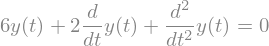

a) Solution:


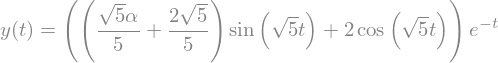

In [2]:
print("Exercise 1.1")
t = sp.Symbol('t')
a = sp.Symbol('alpha')
y = sp.Function('y')(t)
diffeq = sp.Eq(y.diff(t,2)+2*y.diff(t)+6*y,0)
print('Equation')
display(diffeq)
# Solve Equation
sol = sp.dsolve(diffeq, ics = {y.diff(t).subs(t,0):a, y.subs(t,0):2})
print("a) Solution:")
display(sol)

Exercise 1.2


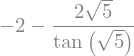

In [3]:
# Part 2. Find as alpha such that y=0 when t=1
print("Exercise 1.2")
# Solve using `solve` function
eqa2 = sp.Eq(0,sol.rhs.subs(t,1))
solution = sp.solve(eqa2, a)[0]
display(solution)
display(solution.evalf())

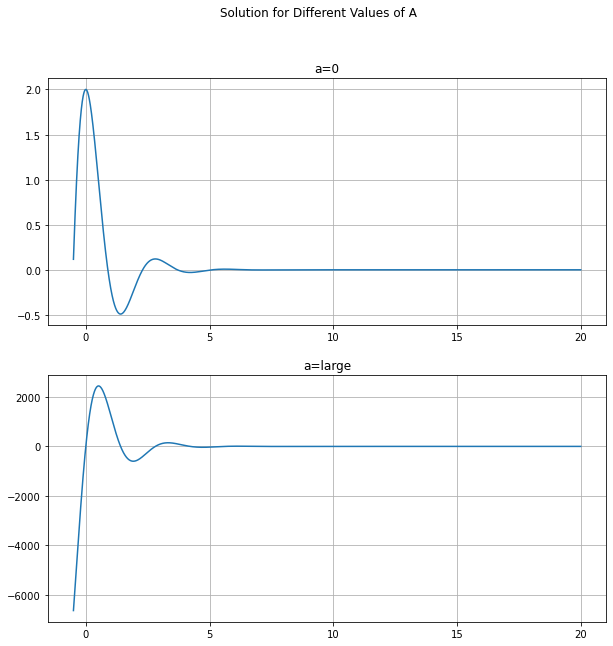

In [4]:
# Part3
lambda_t_a = lambdify([a,t],sol.rhs)
t_range = np.linspace(-0.5,20,1000000)
fig, axs = plt.subplots(2)
fig.suptitle('Solution for Different Values of A')
fig.set_size_inches(10,10)
# Do your your plotting here
axs[0].grid(True)
axs[0].set_title('a=0')
axs[0].plot(t_range, lambda_t_a(0,t_range))
axs[1].grid(True)
axs[1].set_title('a=large')
axs[1].plot(t_range, lambda_t_a(10000,t_range))

In [5]:
#Use those the above graphs to take a guess at the first root with positive t
print("Part 4")
lambda_t_a = lambdify([a,t],sol.rhs)
fPositiveRoot = fsolve(lambda t:lambda_t_a(10000,t),1)
print("Evaluated Solution : {}".format(fPositiveRoot[0]))

Part 4
Evaluated Solution : 1.4047629862134685


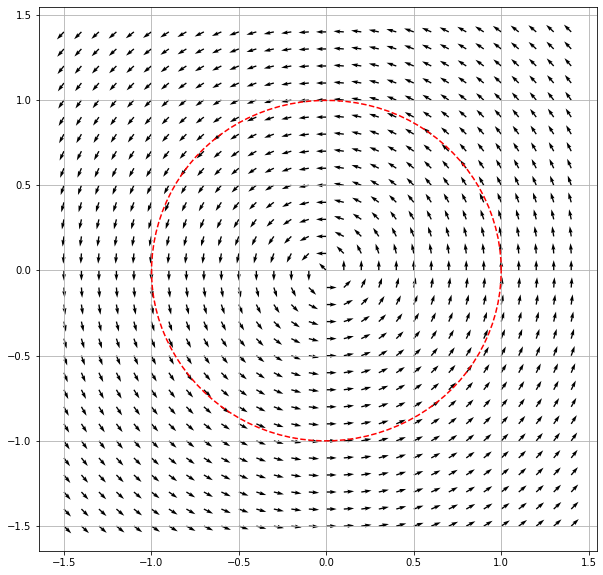

In [9]:
dt = 0.10
t = np.arange(-1.5,1.5,dt)
y = np.arange(-1.5,1.5,dt)
T,Y = np.meshgrid(t,y)
# State differential equation
J = 0+1j
num_diffeq = J*np.exp(J*np.arctan2(Y,T))
num_diffeq /= abs(num_diffeq)

def num_diffeq_lambda(thepar,ypar):
    return J*np.exp(J*thepar)

plt.quiver(T,Y,num_diffeq.real,num_diffeq.imag)
plt.grid()
#Lets get a solution
theta = np.linspace(0,2*np.pi-0.001, 100)
num_sol = solve_ivp(num_diffeq_lambda,[0,2*np.pi],[0j+1],dense_output=True)
y_sol = num_sol.sol(theta)[0]
plt.plot(np.real(y_sol),np.imag(y_sol),'r--')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

The ratio of the imaginary part and the real part of y affect how y will change when there is a small change in theta. The solution of y' = i*exp(i*t) is y = exp(i*t)+C. Applying Euler formula: y = cos(theta)+isin(theta)+C. It's obvious that it is a circle on a complex plane.